# Import libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load data sets

In [2]:
# load data sets
userscore = pd.read_csv('userscore.csv')
historical_transactions = pd.read_csv('historical_transactions.csv')
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv')
merchants = pd.read_csv('merchants.csv')

In [3]:
#display the first 10 rows of userscore
userscore.head(10)
#display the first 10 rows of historical_transactions
historical_transactions.head(10)
#display the first 10 rows of new_merchant_transactions
new_merchant_transactions.head(10)
#display the first 10 rows of merchants
merchants.head(10)

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749
5,C_ID_0894217f2f,Sep-16,4,2,0,0.871585
6,C_ID_7e63323c00,Dec-16,3,2,1,0.230129
7,C_ID_dfa21fc124,Sep-17,3,2,1,2.135850
8,C_ID_fe0fdac8ea,Aug-17,2,1,0,-0.065406
9,C_ID_bf62c0b49d,Aug-16,2,2,0,0.300062


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,2018-03-17 18:10:41,1.0,9,15


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


# Describe how you want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction. Note, this is a very important question, you may want to update your whole pipeline multiple times to find the best usage of three files.

# 1. Join userscore.csv to historical transactions.csv and new merchant transactions.csv on the card id. Using the merchant id, join the resulting data frame to the merchants.csv file (This will provide us more details about the merchants).

In [4]:
# Join the data
df1 = pd.merge(historical_transactions, userscore, on="card_id")
df2 = pd.merge(new_merchant_transactions, userscore, on="card_id")

# Concatenate the two dataframes
df = pd.concat([df1, df2], axis=0)

# Join merchants with the resulting dataframe
df = pd.merge(df, merchants, on='merchant_id')

# 2. clean the data set

I will do some feature engineering is the process of developing new features that may help the regression model perform better.

In [5]:
#Create a new column for the average transaction amount by dividing the purchase amount by the installments
df = df.assign(avg_transaction_amount = lambda x: x['purchase_amount'] / x['installments'])

#Create a new column for the total number of transactions per card by counting the occurrences of each card_id
df = df.assign(total_transactions = lambda x: x.groupby('card_id')['card_id'].transform('size'))

#Create a new column for the number of merchant categories per card by counting the unique values of merchant_category_id for each card_id
df = df.assign(num_merchant_category = lambda x: x.groupby('card_id')['merchant_category_id_x'].transform('nunique'))


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19923436 entries, 0 to 19923435
Data columns (total 43 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id_x                    int64  
 3   category_1_x                 object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id_x       int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2_x                 float64
 12  state_id_x                   int64  
 13  subsector_id_x               int64  
 14  first_active_month           object 
 15  feature_1                    int64  
 16  feature_2                    int64  
 17  feature_3                    int64  
 18  score                        float64
 19

In [7]:
# Randomly sample 100,00 rows from the dataset
New_df = df.sample(n=10000, random_state=42)


<Figure size 800x1000 with 0 Axes>

<Axes: >

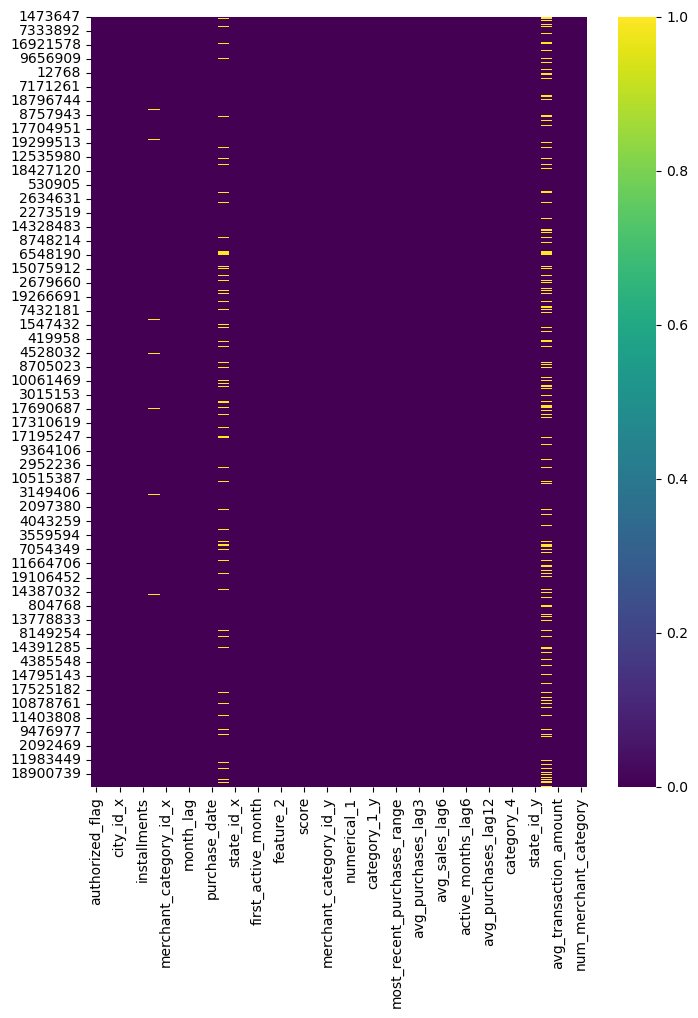

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(New_df.isnull(),cmap='viridis')

In [9]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


<Axes: >

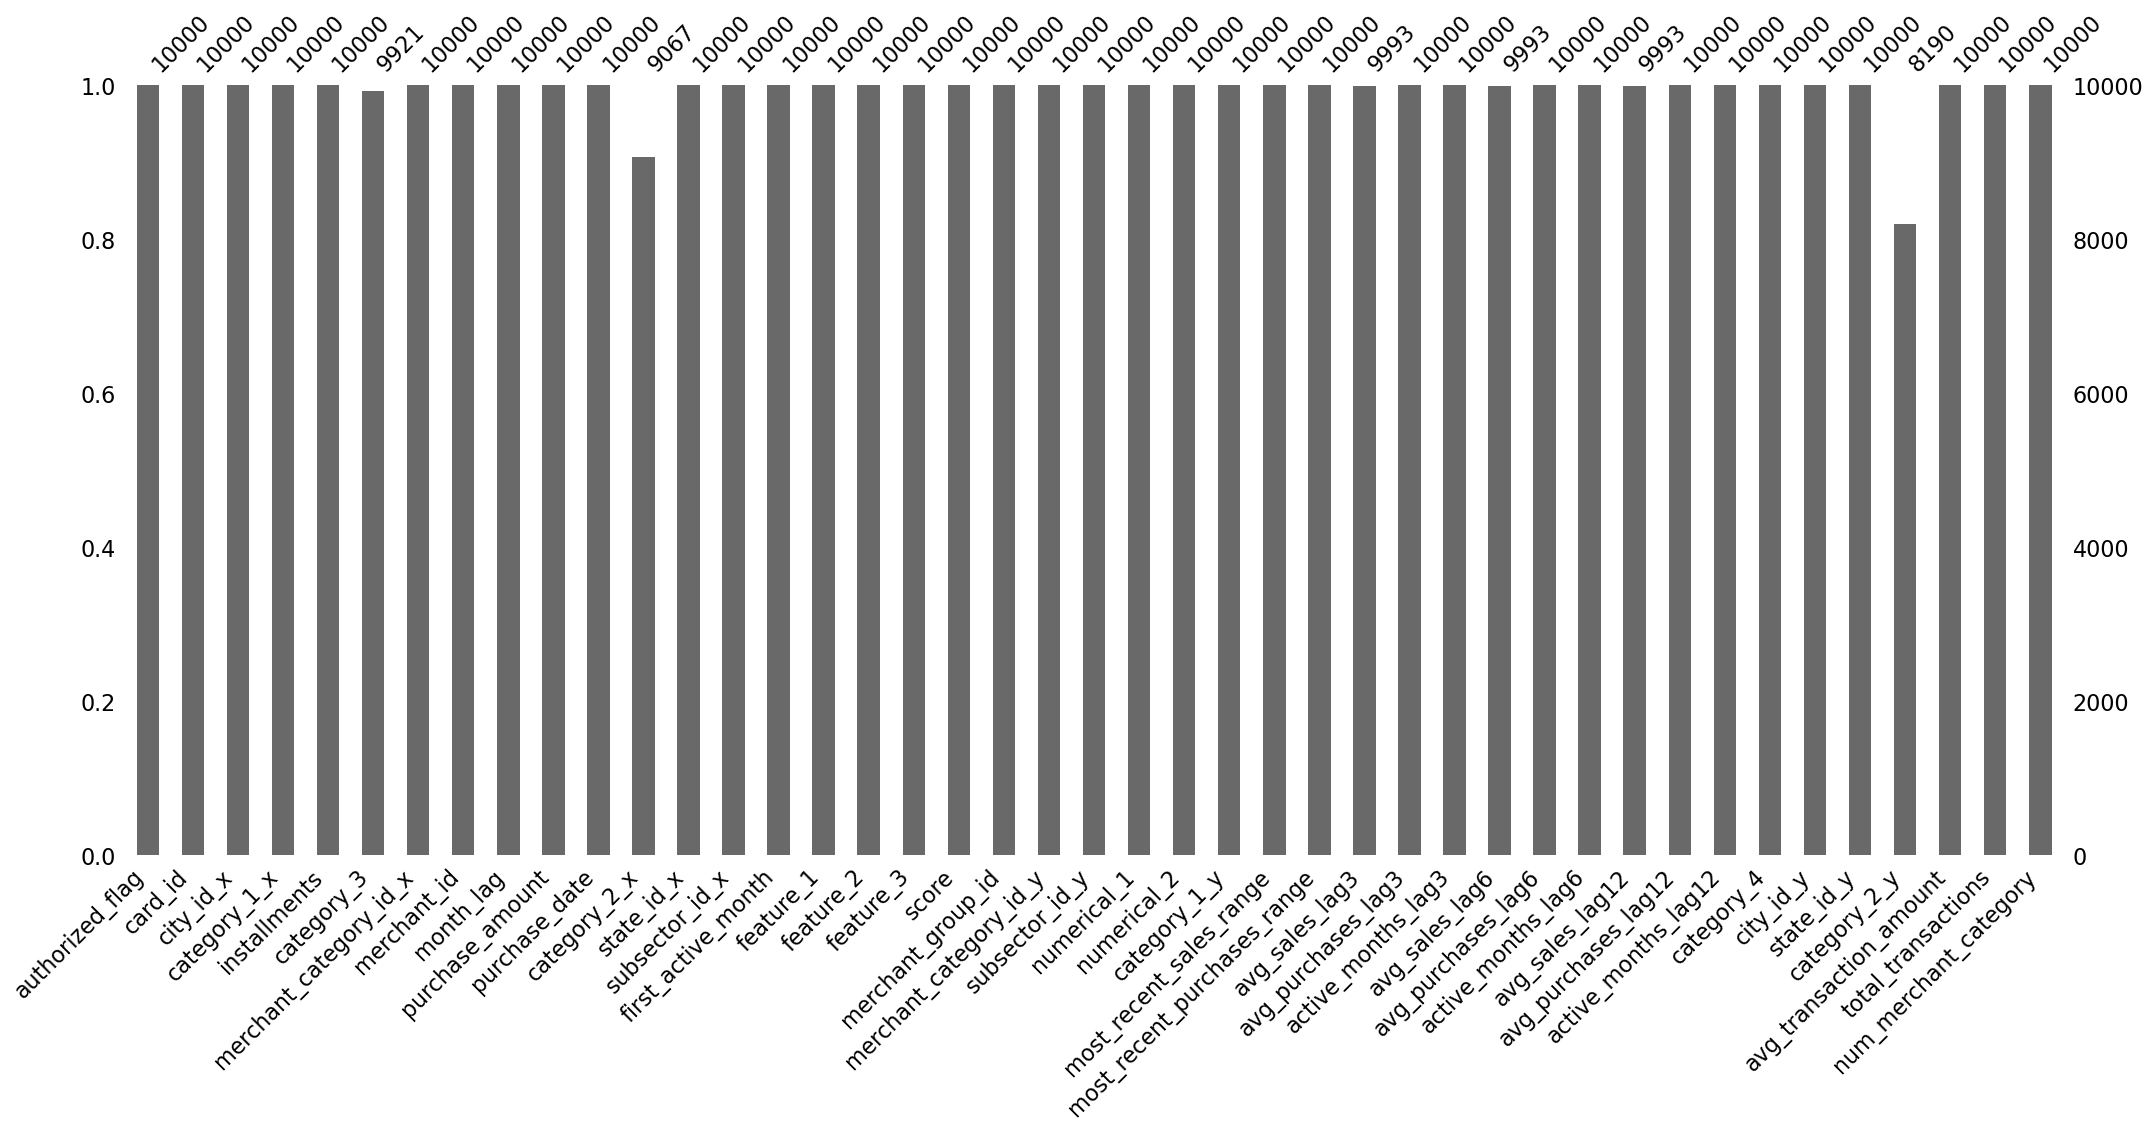

In [10]:
import missingno as msno
msno.bar(New_df)

When I plot all the data the ram crashes 


Dealing with Mising values

In [11]:
#check Null Values in this data set 
df.isnull().sum()

authorized_flag                      0
card_id                              0
city_id_x                            0
category_1_x                         0
installments                         0
category_3                      139528
merchant_category_id_x               0
merchant_id                          0
month_lag                            0
purchase_amount                      0
purchase_date                        0
category_2_x                   1754562
state_id_x                           0
subsector_id_x                       0
first_active_month                   0
feature_1                            0
feature_2                            0
feature_3                            0
score                                0
merchant_group_id                    0
merchant_category_id_y               0
subsector_id_y                       0
numerical_1                          0
numerical_2                          0
category_1_y                         0
most_recent_sales_range  

In [12]:
#missing values percentage per-column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

category_2_y                   1.789747e-01
category_2_x                   8.806523e-02
category_3                     7.003210e-03
avg_sales_lag3                 2.932727e-04
avg_sales_lag6                 2.932727e-04
avg_sales_lag12                2.932727e-04
avg_transaction_amount         5.019215e-08
active_months_lag6             0.000000e+00
most_recent_sales_range        0.000000e+00
most_recent_purchases_range    0.000000e+00
avg_purchases_lag3             0.000000e+00
active_months_lag3             0.000000e+00
avg_purchases_lag6             0.000000e+00
authorized_flag                0.000000e+00
numerical_2                    0.000000e+00
avg_purchases_lag12            0.000000e+00
active_months_lag12            0.000000e+00
category_4                     0.000000e+00
city_id_y                      0.000000e+00
state_id_y                     0.000000e+00
total_transactions             0.000000e+00
category_1_y                   0.000000e+00
subsector_id_y                 0

In [13]:
# impute missing values with mean or median
df['category_3'].fillna(df['category_3'].mode()[0], inplace=True)
df['category_2_x'].fillna(df['category_2_x'].median(), inplace=True)
df['avg_sales_lag3'].fillna(df['avg_sales_lag3'].mean(), inplace=True)
df['avg_sales_lag6'].fillna(df['avg_sales_lag6'].mean(), inplace=True)
df['avg_sales_lag12'].fillna(df['avg_sales_lag12'].mean(), inplace=True)

# drop rows with remaining missing values
df.dropna(inplace=True)

I used the fillna() method to impute missing values with the mode for category_3 and the mean or median for category_2_x, avg_sales_lag3, avg_sales_lag6, and avg_sales_lag12, depending on the column.

I used the dropna() method to drop any remaining rows with missing values. 
This approach is appropriate because the number of rows with missing values is relatively small compared to the overall size of the data set.

Fix any errors in the data

In [14]:
# convert date columns to datetime format
import datetime as dt

df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_date'] =df['purchase_date'].map(dt.datetime.toordinal)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16357644 entries, 0 to 19923435
Data columns (total 43 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id_x                    int64  
 3   category_1_x                 object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id_x       int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                int64  
 11  category_2_x                 float64
 12  state_id_x                   int64  
 13  subsector_id_x               int64  
 14  first_active_month           object 
 15  feature_1                    int64  
 16  feature_2                    int64  
 17  feature_3                    int64  
 18  score                        float64
 19  mer

In [16]:
# Standardize the data
df = df.astype({'authorized_flag': 'category',
                  'card_id': 'category',
                  'city_id_x': 'int64',
                  'category_1_x': 'category',
                  'installments': 'int64',
                  'category_3': 'category',
                  'merchant_category_id_x': 'int64',
                  'merchant_id': 'category',
                  'month_lag': 'int64',
                  'purchase_amount': 'float64',
                  'category_2_x': 'float64',
                  'state_id_x': 'int64',
                  'subsector_id_x': 'int64',
                  'first_active_month': 'category',
                  'feature_1': 'int64',
                  'feature_2': 'int64',
                  'feature_3': 'int64',
                  'score': 'float64',
                  'merchant_group_id': 'int64',
                  'merchant_category_id_y': 'int64',
                  'subsector_id_y': 'int64',
                  'numerical_1': 'float64',
                  'numerical_2': 'float64',
                  'category_1_y': 'category',
                  'most_recent_sales_range': 'category',
                  'most_recent_purchases_range': 'category',
                  'avg_sales_lag3': 'float64',
                  'avg_purchases_lag3': 'float64',
                  'active_months_lag3': 'int64',
                  'avg_sales_lag6': 'float64',
                  'avg_purchases_lag6': 'float64',
                  'active_months_lag6': 'int64',
                  'avg_sales_lag12': 'float64',
                  'avg_purchases_lag12': 'float64',
                  'active_months_lag12': 'int64',
                  'category_4': 'category',
                  'city_id_y': 'int64',
                  'state_id_y': 'int64',
                  'category_2_y': 'float64',
                  'avg_transaction_amount': 'float64',
                  'total_transactions': 'int64',
                  'num_merchant_category': 'int64'})

Dropping irrelevant columns:

In [17]:
# drop columns that are not relevant or have too many missing values
df.drop(columns=['card_id', 'merchant_id', 'merchant_group_id'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16357644 entries, 0 to 19923435
Data columns (total 40 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   authorized_flag              category
 1   city_id_x                    int64   
 2   category_1_x                 category
 3   installments                 int64   
 4   category_3                   category
 5   merchant_category_id_x       int64   
 6   month_lag                    int64   
 7   purchase_amount              float64 
 8   purchase_date                int64   
 9   category_2_x                 float64 
 10  state_id_x                   int64   
 11  subsector_id_x               int64   
 12  first_active_month           category
 13  feature_1                    int64   
 14  feature_2                    int64   
 15  feature_3                    int64   
 16  score                        float64 
 17  merchant_category_id_y       int64   
 18  subsector_id_y           

Encoding categorical variables:

I use label encoding because one-hot encoding can result in high-dimensional data.

In [19]:
from sklearn.preprocessing import LabelEncoder

#Select the categorical columns
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

#Apply label encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#Check the updated DataFrame
print(df.head())

   authorized_flag  city_id_x  category_1_x  installments  category_3   
0                0        322             0             1           1  \
1                1        322             0             1           1   
2                1        322             0             1           1   
3                1        322             0             0           0   
4                1        322             0             0           0   

   merchant_category_id_x  month_lag  purchase_amount  purchase_date   
0                     278         -3        -0.595260         736579  \
1                     278         -3        -0.595260         736579   
2                     278         -3        -0.595290         736579   
3                     278         -4        -0.560128         736613   
4                     278         -2        -0.585162         736671   

   category_2_x  ...  avg_sales_lag12  avg_purchases_lag12   
0           3.0  ...             0.89              0.91968  \
1   

Checking for duplicates and outliers:

In [20]:
# Check for duplicate rows
df.duplicated().sum()
#Remove duplicate
df.drop_duplicates(inplace=True)

329017

In [21]:
df.head()

,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,month_lag,purchase_amount,purchase_date,category_2_x,...,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,avg_transaction_amount,total_transactions,num_merchant_category
0,0,322,0,1,1,278,-3,-0.595260,736579,3.0,...,0.89,0.91968,12,0,-1,11,3.0,-0.59526,125,21
1,1,322,0,1,1,278,-3,-0.595260,736579,3.0,...,0.89,0.91968,12,0,-1,11,3.0,-0.59526,125,21
2,1,322,0,1,1,278,-3,-0.595290,736579,3.0,...,0.89,0.91968,12,0,-1,11,3.0,-0.59529,125,21
3,1,322,0,0,0,278,-4,-0.560128,736613,3.0,...,0.89,0.91968,12,0,-1,11,3.0,-inf,813,62
4,1,322,0,0,0,278,-2,-0.585162,736671,3.0,...,0.89,0.91968,12,0,-1,11,3.0,-inf,813,62


# 3. For a deeper understanding of the data, I will do out some exploratory data analysis (EDA). (This would involve looking at the distribution of the data, identifying any patterns, and exploring the relationships between the different variables.)

In [22]:
df.describe(include="all")


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,month_lag,purchase_amount,purchase_date,category_2_x,...,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,avg_transaction_amount,total_transactions,num_merchant_category
count,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,...,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07,1.602863e+07
mean,9.475267e-01,1.444244e+02,1.199728e-04,5.457103e-01,4.757485e-01,4.438188e+02,-4.188720e+00,2.199450e-01,7.365856e+05,2.233521e+00,...,1.298750e+02,inf,1.194125e+01,4.395998e-01,1.043768e+02,1.204383e+01,2.264129e+00,NaN,2.271208e+02,3.156468e+01
std,2.229795e-01,1.020324e+02,1.095255e-02,2.679458e+00,5.909072e-01,2.377580e+02,3.813516e+00,1.509246e+03,1.224039e+02,1.536550e+00,...,9.981246e+03,NaN,4.961874e-01,4.963384e-01,9.904523e+01,5.533793e+00,1.550004e+00,NaN,2.037378e+02,1.470420e+01
min,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,7.363300e+05,1.000000e+00,...,-8.213000e+01,9.832954e-02,1.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-inf,2.000000e+00,1.000000e+00
25%,1.000000e+00,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.780000e+02,-7.000000e+00,-7.193792e-01,7.364910e+05,1.000000e+00,...,9.600000e-01,9.858617e-01,1.200000e+01,0.000000e+00,1.000000e+01,9.000000e+00,1.000000e+00,NaN,8.700000e+01,2.100000e+01
50%,1.000000e+00,1.370000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.120000e+02,-3.000000e+00,-6.869520e-01,7.366010e+05,1.000000e+00,...,1.060000e+00,1.065736e+00,1.200000e+01,0.000000e+00,6.900000e+01,9.000000e+00,1.000000e+00,NaN,1.650000e+02,3.000000e+01
75%,1.000000e+00,2.300000e+02,0.000000e+00,1.000000e+00,1.000000e+00,7.050000e+02,-1.000000e+00,-6.049974e-01,7.366850e+05,3.000000e+00,...,1.180000e+00,1.171743e+00,1.200000e+01,1.000000e+00,1.600000e+02,1.600000e+01,4.000000e+00,-6.750059e-01,3.040000e+02,4.100000e+01
max,1.000000e+00,3.470000e+02,1.000000e+00,9.990000e+02,2.000000e+00,8.910000e+02,2.000000e+00,6.010604e+06,7.368140e+05,5.000000e+00,...,2.567408e+06,inf,1.200000e+01,1.000000e+00,3.470000e+02,2.400000e+01,5.000000e+00,inf,2.892000e+03,9.700000e+01


<Axes: xlabel='score', ylabel='Count'>

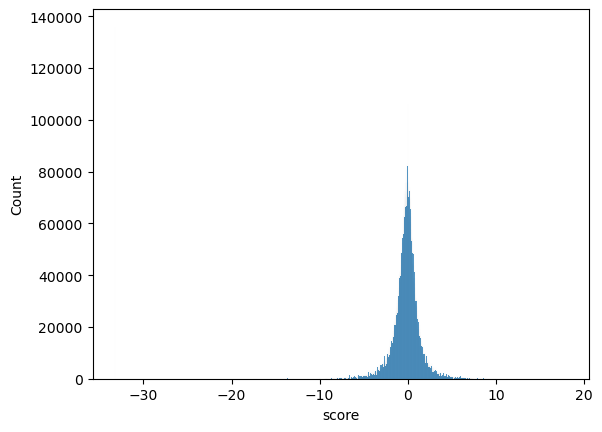

In [23]:
# Check the distribution of the target variable
sns.histplot(df['score'])


<Axes: xlabel='score'>

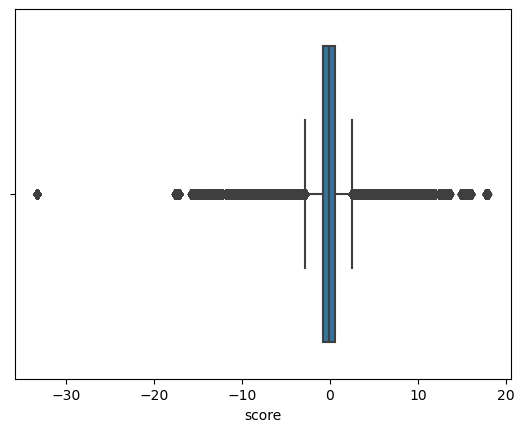

In [24]:
# Check for outliers 
sns.boxplot(x='score', data=df)

Removing outliers may not always be the best approach, as it could result in loss of information.

In [25]:
# Randomly sample 100,00 rows from the dataset after cleaning
New_df = df.sample(n=10000, random_state=42)


# 4. Split data into train test spilt

In [26]:
# Split the data into train and test sets
X = New_df.drop(['score'], axis=1)
y = New_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Check for infinite or large values

In [27]:
import numpy as np

print(np.isinf(X_train).any())
print(np.isnan(X_train).any())
print(X_train.describe())

authorized_flag                False
city_id_x                      False
category_1_x                   False
installments                   False
category_3                     False
merchant_category_id_x         False
month_lag                      False
purchase_amount                False
purchase_date                  False
category_2_x                   False
state_id_x                     False
subsector_id_x                 False
first_active_month             False
feature_1                      False
feature_2                      False
feature_3                      False
merchant_category_id_y         False
subsector_id_y                 False
numerical_1                    False
numerical_2                    False
category_1_y                   False
most_recent_sales_range        False
most_recent_purchases_range    False
avg_sales_lag3                 False
avg_purchases_lag3             False
active_months_lag3             False
avg_sales_lag6                 False
a

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


#Handle infinite or large values

In [28]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)


In [29]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_train.mean(), inplace=True)


# 5. Build linear regression model

In [30]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 6. Evaluate the linear regression model

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


MAE: 1.284191697739411
MSE: 10.454963066803447
R2: 0.018314903491977508


The MAE is 1.28419, the MSE is 10.45496, and the R2 value is 0.018315. These values indicate that the regression model is not a very good fit for the data. The MAE and MSE are both relatively high, and the R2 value is relatively low. This suggests that the model is not able to accurately predict the values of the dependent variable.

# Discuss the quality of the dataset, considering missing values, missing value patterns, missing value mechanism, and noise (e.g., consistency). Note, you do not need to discuss each attribute in each table. Focus on the ones you believe are the most important for user (card) loyalty analysis and prediction.

As we found when cleaning the data, there are a few missing values. in this columns

Patterns of Missing Data:
I drawed it before cleaning the data set

Mechanisms of Missing Data:
category_2_y --> Missing data are MCAR (the reason for missing values in the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)                  
category_2_x --> Missing data are MCAR (the reason for missing values in the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)                  
category_3  --> Missing data are MCAR (the reason for missing values in the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)                   
avg_sales_lag12 -->  Missing data are MAR (avg_sales_lag12 has Null values when avg_sales_lag3 and avg_sales_lag6 have Null values)           
avg_sales_lag3  --> Missing data are MAR (avg_sales_lag3 has Null values when avg_sales_lag12 and avg_sales_lag6 have Null values)             
avg_sales_lag6 --> Missing data are MAR (avg_sales_lag6 has Null values when avg_sales_lag12 and avg_sales_lag3 have Null values)              
Noise: 
Regarding noise, it seems that there are some outliers in the avg_transaction_amount column, which are values that are much higher or lower than the other values in the column. Additionally, there are negative values in the installments column, which may not be logical. Noise in the data can affect the accuracy and generalization ability of machine learning models, and it's important to consider the impact of noise on the analysis and results.


# dealing with Noise

In [32]:
New_df['installments'] = np.where(New_df['installments'] < 0, np.nan, New_df['installments'])
New_df['installments']=New_df['installments'].fillna(0)


In [33]:
New_df['avg_transaction_amount'].head(10)


9727678    -0.178876
16610179   -0.717321
18949703        -inf
15321959    1.294511
10649213   -0.376955
5025881          inf
15869105        -inf
3725190         -inf
7037941         -inf
13030627   -0.725255
Name: avg_transaction_amount, dtype: float64

it seem most of this values not true so i will remove this column
Removing columns that are not useful or contain a lot of noise can be useful for improving the quality of the data and reducing the dimensionality of the data for computational efficiency. 

In [34]:
New_df = New_df.drop(['avg_transaction_amount'], axis=1)


# Perform necessary data cleaning based on your answer to Q2.
I cleaned the data in the previous steps. but we need to do some additional steps

 # Report important statistics in preprocessed data createdin Q3. The target user loyalty score must be covered in the statistical analysis.

<Figure size 2500x2500 with 0 Axes>

<Axes: >

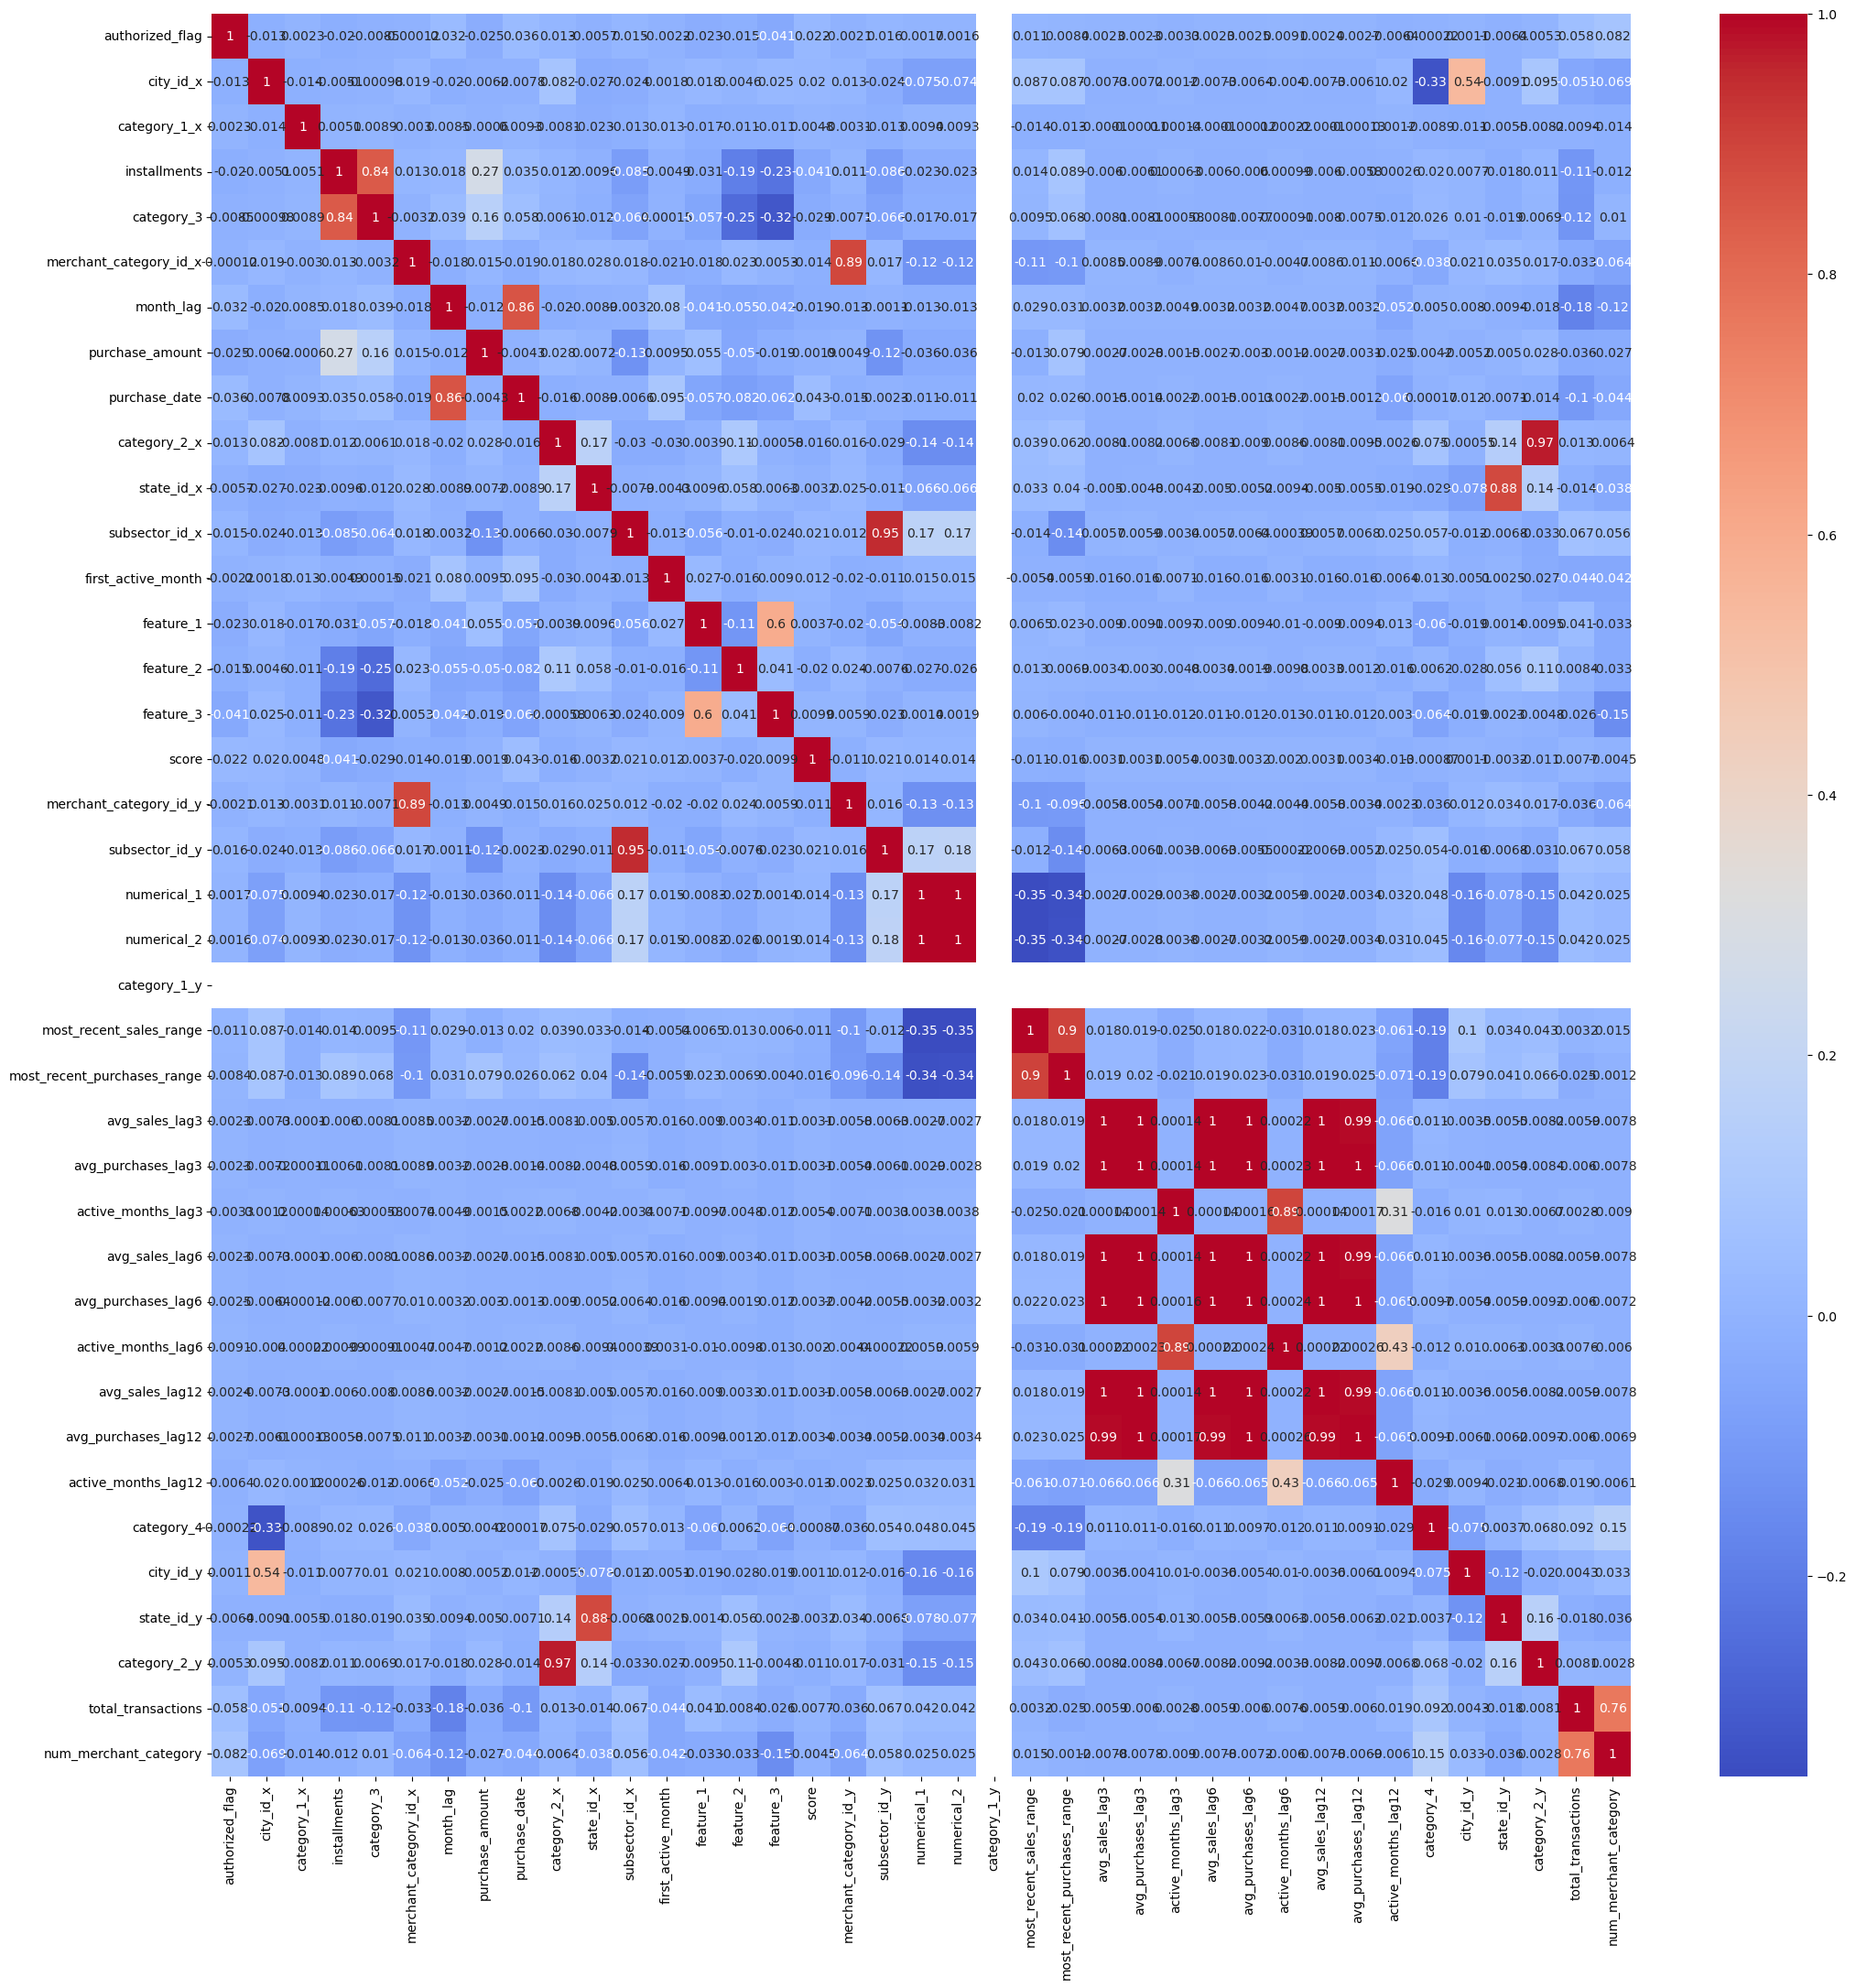

In [38]:
# Calculate the correlation matrix for all variables
correlation_matrix = New_df.corr()
# Set figure size
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Show plot
plt.show()


In [39]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 9727678 to 10072685
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   authorized_flag              10000 non-null  int64  
 1   city_id_x                    10000 non-null  int64  
 2   category_1_x                 10000 non-null  int64  
 3   installments                 10000 non-null  float64
 4   category_3                   10000 non-null  int64  
 5   merchant_category_id_x       10000 non-null  int64  
 6   month_lag                    10000 non-null  int64  
 7   purchase_amount              10000 non-null  float64
 8   purchase_date                10000 non-null  int64  
 9   category_2_x                 10000 non-null  float64
 10  state_id_x                   10000 non-null  int64  
 11  subsector_id_x               10000 non-null  int64  
 12  first_active_month           10000 non-null  int64  
 13  feature_1   

In [40]:
New_df.describe(include="all")


,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,month_lag,purchase_amount,purchase_date,category_2_x,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,total_transactions,num_merchant_category
count,10000.000000,10000.00000,10000.0000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.948100,143.45090,0.0001,0.53990,0.475800,439.295300,-4.200900,-0.586030,736585.288600,2.242100,...,5.998600,70.982944,7.582928,11.947200,0.442700,103.489300,12.072300,2.270400,228.437100,31.55840
std,0.221836,101.87367,0.0100,0.89671,0.589618,238.400935,3.784068,0.549009,121.494824,1.541663,...,0.063233,6895.671957,505.482783,0.449258,0.496731,98.259509,5.538388,1.551813,202.769454,14.76193
min,0.000000,-1.00000,0.0000,0.00000,0.000000,2.000000,-13.000000,-0.746893,736330.000000,1.000000,...,2.000000,0.190000,0.170191,2.000000,0.000000,-1.000000,1.000000,1.000000,6.000000,1.00000
25%,1.000000,69.00000,0.0000,0.00000,0.000000,278.000000,-7.000000,-0.718733,736492.000000,1.000000,...,6.000000,0.960000,0.986670,12.000000,0.000000,10.000000,9.000000,1.000000,88.000000,21.00000
50%,1.000000,137.00000,0.0000,0.00000,0.000000,387.000000,-3.000000,-0.686802,736600.000000,1.000000,...,6.000000,1.060000,1.064819,12.000000,0.000000,69.000000,9.000000,1.000000,165.000000,29.00000
75%,1.000000,219.00000,0.0000,1.00000,1.000000,705.000000,-1.000000,-0.605482,736685.000000,4.000000,...,6.000000,1.180000,1.171255,12.000000,1.000000,160.000000,16.000000,4.000000,305.000000,41.00000
max,1.000000,347.00000,1.0000,12.00000,2.000000,891.000000,2.000000,29.306116,736814.000000,5.000000,...,6.000000,689561.850000,50215.555556,12.000000,1.000000,347.000000,24.000000,5.000000,1700.000000,95.00000


# Boxplot to visualize the distribution of the target variable:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9146a83340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9146a83880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9146a830a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9146a83dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9146a900a0>],
 'means': []}

Text(0.5, 0, 'Score')

Text(0.5, 1.0, 'Boxplot of Score')

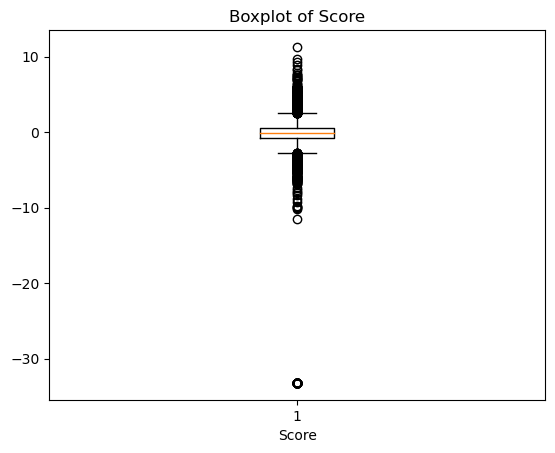

In [41]:
# Boxplot of the target variable
plt.boxplot(New_df['score'])
plt.xlabel('Score')
plt.title('Boxplot of Score')
plt.show()

# 1. The hypothesis test is:
"Is there a significant difference in the average number of transactions per customer between customers who have a high loyalty score (score >= 70%) and those who have a low loyalty score (score < 70%)?

let's test whether there is a significant difference in the average number of transactions per customer between customers who have a high score (score >= 70%) and those who have a low score (score < 70%). 

The null hypothesis(H0) is that there is no significant difference in the average number of transactions per customer between customers who have a high score and those who have a low score.
The alternative hypothesis(H1) is that there is a significant difference.

In [42]:
high_score = New_df[New_df['score'] >= 0.7]['total_transactions']
low_score = New_df[New_df['score'] < 0.7]['total_transactions']

In [43]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(high_score, low_score)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -11.962314789276903
p-value: 9.362074230152325e-33


The t-statistic of -11.962314789276903 indicates that the difference in the average number of transactions per customer between the high score and low score groups is 9.362074230152325e-33 standard errors away from the null hypothesis mean. The negative sign indicates that the average number of transactions per customer is lower for the high score group than for the low score group.

I reject the null hypothesis and conclude that there is a significant difference in the average number of transactions per customer between customers who have a high score (score >= 70%) and those who have a low score (score < 70%).

# Propose two hypothesis tests exploring information relatedto user loyalty score. For each hypothesis test, you must describe themotivation (why this hypothesis is interesting and important to test), null hypothesis, and select a proper statistical test to report the test result.


I do one of them in the pervious steps:

The hypothesis of testing whether there is a significant difference in the average number of transactions per customer between customers who have a high score (score >= 70%) and those who have a low score (score < 70%) is interesting and important to test for several reasons:

Business impact: If there is a significant difference in the average number of transactions per customer between high and low score groups, this could have important business implications. For example, it could help the company identify which customers are more likely to engage in repeat transactions and target them with specific marketing campaigns or loyalty programs.

Customer segmentation: The hypothesis test could help the company identify different customer segments based on their loyalty scores and transaction behavior. 

Performance evaluation: If the hypothesis test reveals a significant difference in the number of transactions per customer between high and low score groups, this could help the company evaluate the performance of its scoring system. It could also help the company identify areas for improvement in its scoring system and transaction processes.

In [44]:
# Set the significance level
alpha = 0.05
if p_value < alpha:
    print("I reject the null hypothesis.")
    print("There is a significant difference in the average number of transactions per customerbetween high and low score groups.")
else:
    print("I fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of transactions per customer between high and low score groups.")

I reject the null hypothesis.
There is a significant difference in the average number of transactions per customerbetween high and low score groups.


Q-Q plots to check the normality assumption

((array([-3.39504764, -3.14417806, -3.00503983, ...,  3.00503983,
          3.14417806,  3.39504764]),
  array([   8,    9,    9, ..., 1103, 1103, 1290])),
 (152.27889626045297, 180.5653465346535, 0.8792415603669226))

Text(0.5, 1.0, 'Q-Q Plot for High Score Group')

((array([-3.75446293, -3.52614257, -3.40064325, ...,  3.40064325,
          3.52614257,  3.75446293]),
  array([   6,    7,    7, ..., 1648, 1648, 1700])),
 (189.2507387852006, 240.55501253132832, 0.909915327530206))

Text(0.5, 1.0, 'Q-Q Plot for Low Score Group')

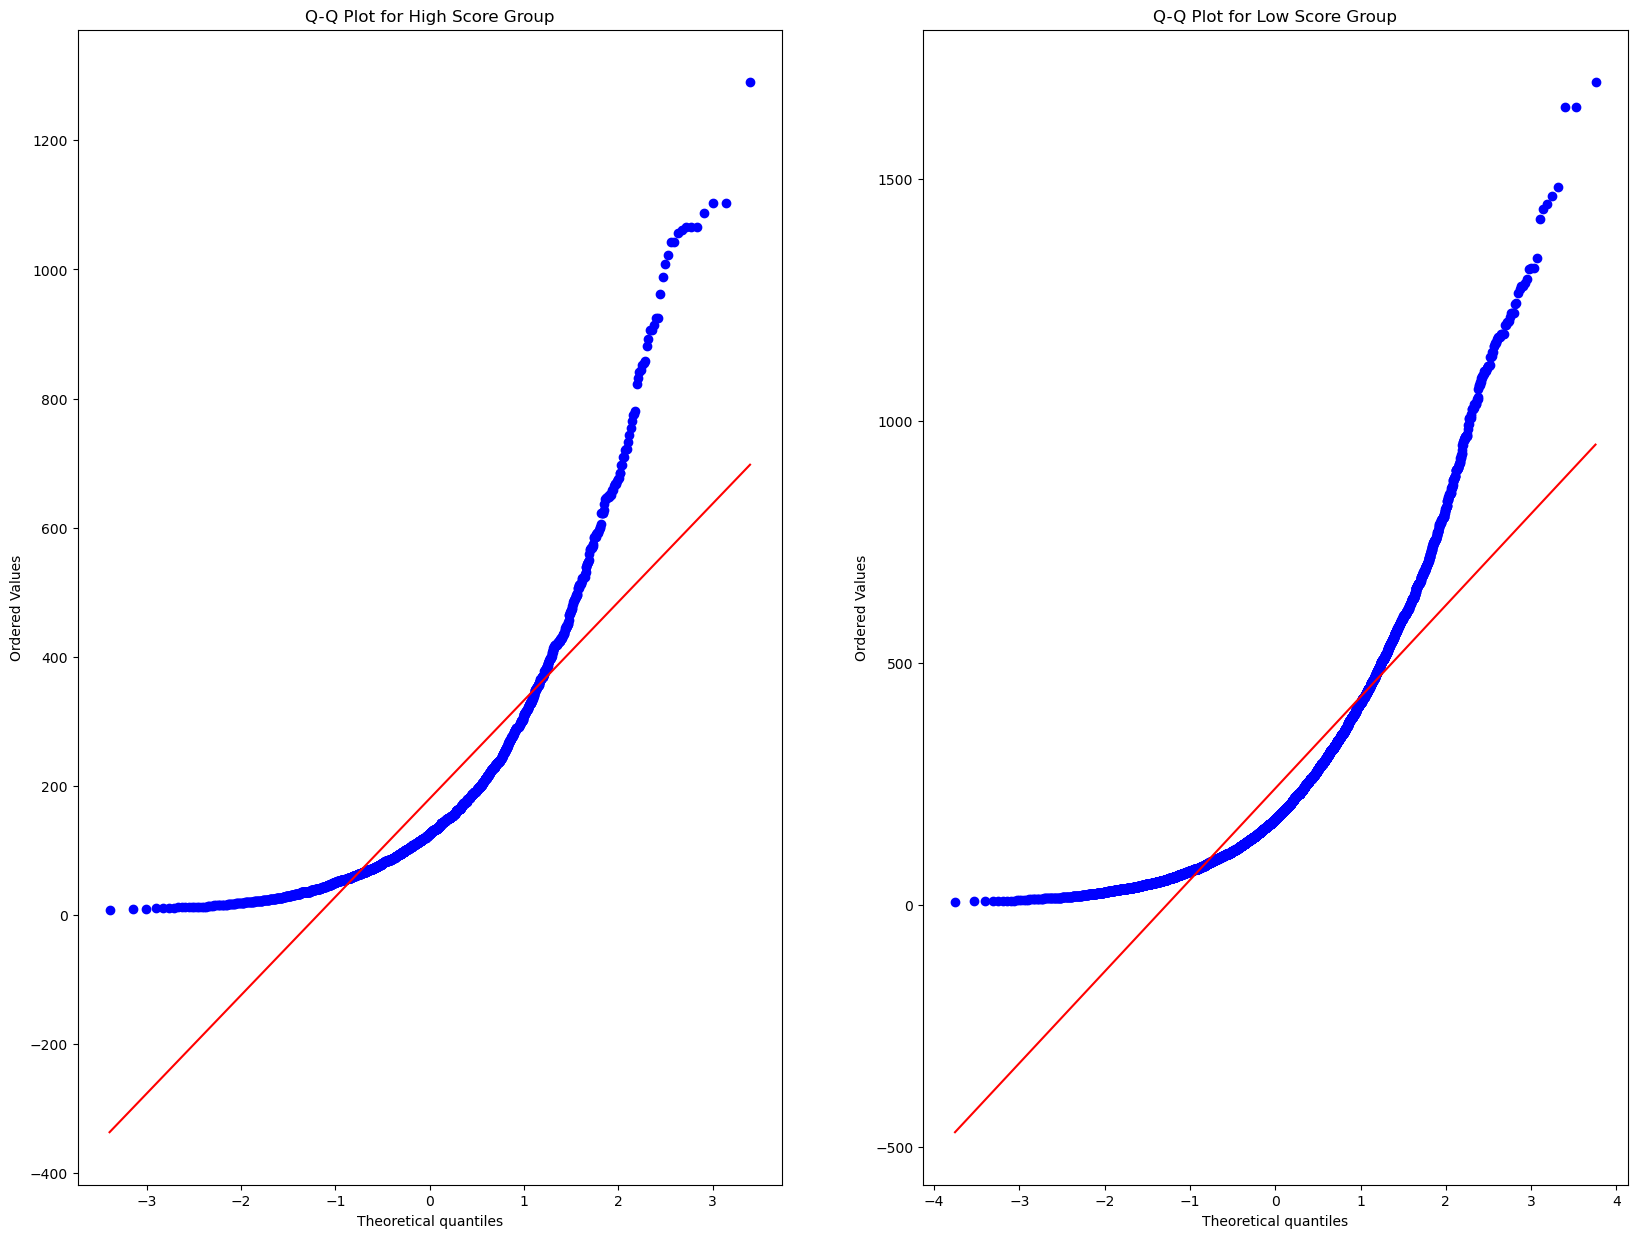

In [45]:
# Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(20,15))
stats.probplot(high_score, plot=axes[0])
axes[0].set_title('Q-Q Plot for High Score Group')

stats.probplot(low_score, plot=axes[1])
axes[1].set_title('Q-Q Plot for Low Score Group')

plt.show()

The distribution of the high_score group is not perfectly normal, but still approximately normal. Similarly, The distribution of the low_score group is also not perfectly normal, but still approximately normal.

The statistical tests:

In [46]:
# Check normality assumption
print("Normality Test:")
print("High score group:", stats.shapiro(high_score))
print("Low score group:", stats.shapiro(low_score))

# Check equal variance assumption
print("\nEqual Variance Test:")
print(stats.levene(high_score, low_score))

Normality Test:
High score group: ShapiroResult(statistic=0.7734099626541138, pvalue=0.0)
Low score group: ShapiroResult(statistic=0.8280395865440369, pvalue=0.0)

Equal Variance Test:
LeveneResult(statistic=69.26454854699723, pvalue=9.735764133761313e-17)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-values for the Shapiro-Wilk test are both less than 0.05. This means that you can reject the null hypothesis and conclude that the distributions of the high score and low score groups are not normal.

The p-value for the Levene test is less than 0.05. This means that you can reject the null hypothesis and conclude that the variances of the high score and low score groups are not equal.

The Q-Q plots and the statistical tests suggest that the high score group and low score group are not normally distributed and that the variances of the high and low score groups are not equal. 

# 2. Hypothesis test:
Is there a significant difference in the average number of active months in the last 12 months between high loyalty score customers and low loyalty score customers?


HO : There is no significant difference in the average number of active months in the last 12 months between high and low loyalty score customers.

H1 : There is a significant difference in the average number of active months in the last 12 months between high and low loyalty score customers.

In [47]:
# Splitthe data into two groups based on loyalty score
high_score = df[df['score'] >= 0.7]
low_score = df[df['score'] < 0.7]

#Calculate the average number of active months for high loyalty score customers
high_loyalty_score_average_active_months = high_score['active_months_lag12'].mean()

#Calculate the average number of active months for low loyalty score customers
low_loyalty_score_average_active_months = low_score['active_months_lag12'].mean()

#Perform a t-test to compare the means
t_statistic2, p_value2 = stats.ttest_ind(high_score['active_months_lag12'],low_score['active_months_lag12'],equal_var=False)


# Print the results
print("T-statistic:", t_statistic2)
print("p-value:", p_value2)

T-statistic: 9.562043254284136
p-value: 1.1550167576718663e-21


The t-test results show a t-statistic of 9.56 and a p-value of 1.16e-21. Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the average number of active months between the two groups. Specifically, the high_score group has a significantly higher average number of active months compared to the low_score group.

In [48]:
# Set the significance level

if p_value < alpha:
    print("I reject the null hypothesis.")
    print("There is no significant difference in the average number of active months in the last 12 months between high and low loyalty score customers.")
else:
    print("I fail to reject the null hypothesis.")
    print("There is a significant difference in the average number of active months in the last 12 months between high and low loyalty score customers.")

I reject the null hypothesis.
There is no significant difference in the average number of active months in the last 12 months between high and low loyalty score customers.


Q-Q plots to check the normality assumption

((array([-5.05888432, -4.88703727, -4.794347  , ...,  4.794347  ,
          4.88703727,  5.05888432]),
  array([ 1,  1,  1, ..., 12, 12, 12])),
 (0.14970310900376993, 11.943551858459845, 0.3080859912354616))

Text(0.5, 1.0, 'Q-Q Plot for High Loyalty Score Group')

((array([-5.3113725 , -5.14741509, -5.05917714, ...,  5.05917714,
          5.14741509,  5.3113725 ]),
  array([ 1,  1,  1, ..., 12, 12, 12])),
 (0.15641577311275795, 11.940661759708263, 0.3135826077095095))

Text(0.5, 1.0, 'Q-Q Plot for Low Loyalty Score Group')

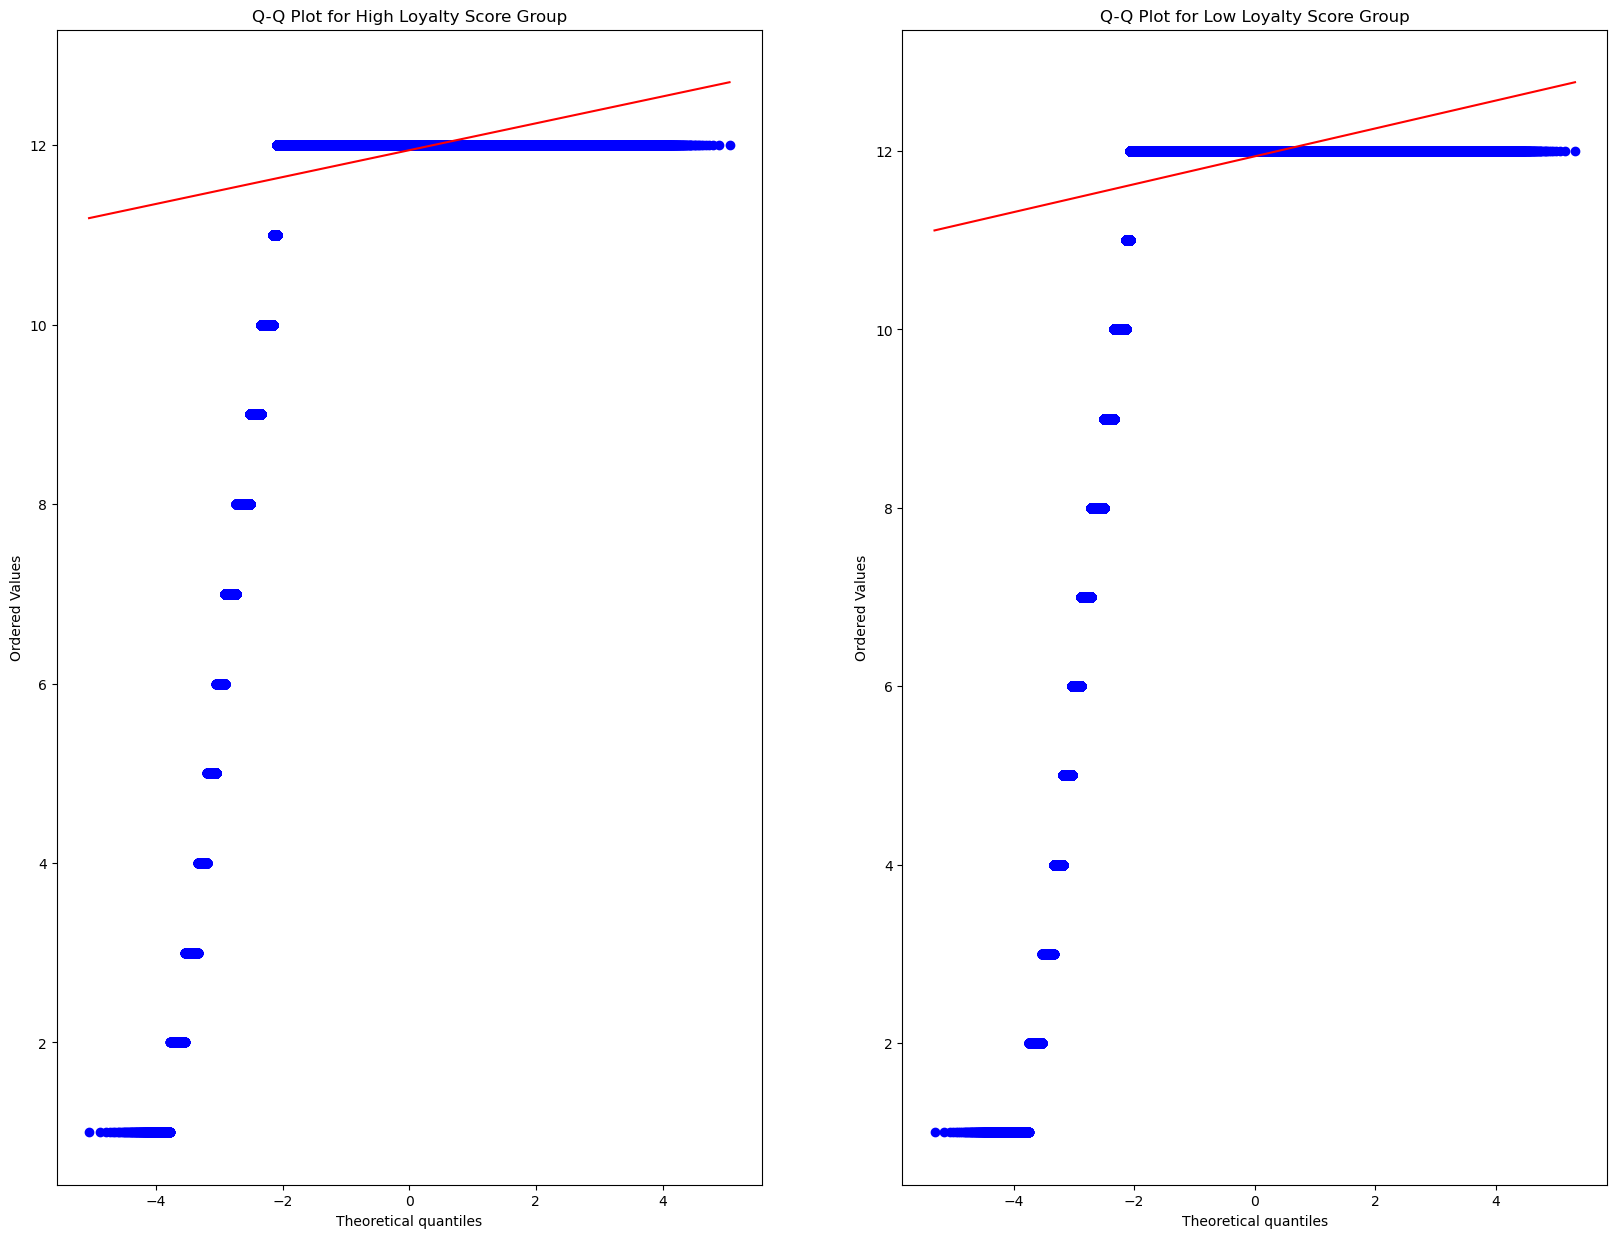

In [49]:
# Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(20,15))
stats.probplot(high_score['active_months_lag12'], plot=axes[0])
axes[0].set_title('Q-Q Plot for High Loyalty Score Group')

stats.probplot(low_score['active_months_lag12'], plot=axes[1])
axes[1].set_title('Q-Q Plot for Low Loyalty Score Group')

plt.show()

The data in both the high and low loyalty score groups are not normally distributed.

The statistical tests:

In [50]:
# Check normality assumption
print("Normality Test:")
print("High score group:", stats.shapiro(high_score['active_months_lag12']))
print("Low score group:", stats.shapiro(low_score['active_months_lag12']))

# Check equal variance assumption
print("\nEqual Variance Test:")
print(stats.levene(high_score['active_months_lag12'], low_score['active_months_lag12']))

Normality Test:
High score group: ShapiroResult(statistic=0.09642350673675537, pvalue=0.0)
Low score group: ShapiroResult(statistic=0.10164129734039307, pvalue=0.0)

Equal Variance Test:
LeveneResult(statistic=88.65240813992764, pvalue=4.7071232453829956e-21)


The Shapiro-Wilk test and the Levene test both suggest that the data in both the high and low score groups is not normally distributed and that the variances of the two groups are not equal.

# Randomly split your selected dataset into training and testing sets based on theresults and preprocessing data from answers to above questions. 

I will do it again

In [51]:
# Split the data into train and test sets
X2 = New_df.drop(['score'], axis=1)
y2 = New_df['score']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [52]:
# Normalize the input variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Create a regression model for user loyalty score prediction based on the above analysis. You need to determine what features to useand which regression model to use.

In [53]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 9727678 to 10072685
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   authorized_flag              10000 non-null  int64  
 1   city_id_x                    10000 non-null  int64  
 2   category_1_x                 10000 non-null  int64  
 3   installments                 10000 non-null  float64
 4   category_3                   10000 non-null  int64  
 5   merchant_category_id_x       10000 non-null  int64  
 6   month_lag                    10000 non-null  int64  
 7   purchase_amount              10000 non-null  float64
 8   purchase_date                10000 non-null  int64  
 9   category_2_x                 10000 non-null  float64
 10  state_id_x                   10000 non-null  int64  
 11  subsector_id_x               10000 non-null  int64  
 12  first_active_month           10000 non-null  int64  
 13  feature_1   

In [54]:
# Fit a linear regression model 
model = LinearRegression(fit_intercept=True)
model.fit(X_train_s, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


MAE: 647573.7803878578
MSE: 419352154848.11664
R2: -40676288855.012436


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


The results show a large mean absolute error (MAE) of 647573.7803878578 and a very large mean squared error (MSE) of 419352154848.11664 indicating poor model performance. The negative R-squared value of -40676288855.012436 suggests that the model is performing worse than simply predicting the mean of the target variable.

Lasso regression to select the most important features:

In [56]:
from sklearn.linear_model import Lasso

# Fit a Lasso regression model to select important features (i will remove StandardScaler)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coef = pd.Series(lasso.coef_, index = X_train.columns)
important_features = coef[coef.abs() > 0].index.tolist()

# Select the important features in the training and test data
X_train_lasso = X_train[important_features]
X_test_lasso = X_test[important_features]

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.293e+04, tolerance: 8.389e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [57]:
# Train a linear regression model on the selected features
model.fit(X_train_lasso, y_train)

# Evaluate the model's performance on the test set
y_pred_l = model.predict(X_test_lasso)

# Evaluate the model's performance
print('MAE:', mean_absolute_error(y_test, y_pred_l))
print('MSE:', mean_squared_error(y_test, y_pred_l))
print('R2:', r2_score(y_test, y_pred_l))


LinearRegression()

MAE: 1.2719581351799871
MSE: 10.212231779588867
R2: 0.009434707968635436


The performance of the model on the test set has improved, with a smaller mean absolute error (MAE) of 1.2719581351799871 and mean squared error (MSE) of 10.212231779588867 and a positive R-squared value of  0.009434707968635436 indicating that the model is performing better than simply predicting the mean of the target variable.

# Detect if multicollinearity exists in selected features (used in Q6).

<Axes: >

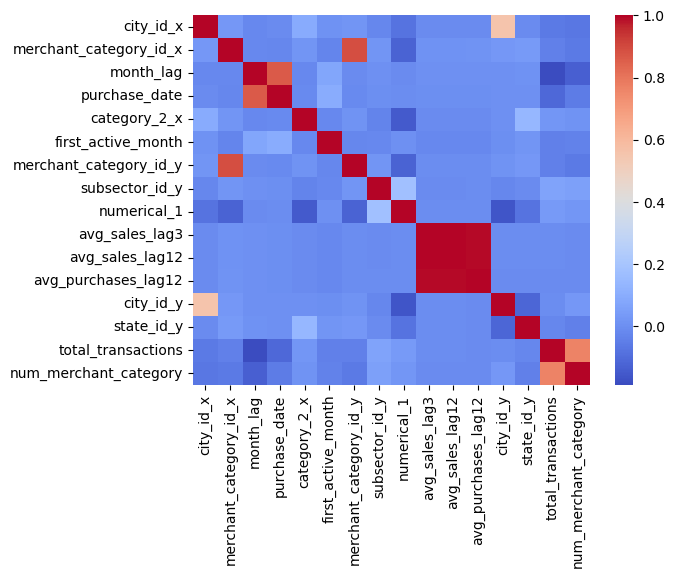

In [58]:
# Calculate the correlation matrix
corr_matrix = X_train_lasso.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

In [59]:
# Print the correlation coefficients between pairs of features
print(X_train_lasso.corr())

                        city_id_x  merchant_category_id_x  month_lag   
city_id_x                1.000000                0.025507  -0.019892  \
merchant_category_id_x   0.025507                1.000000  -0.017699   
month_lag               -0.019892               -0.017699   1.000000   
purchase_date           -0.009389               -0.023430   0.864180   
category_2_x             0.090472                0.017078  -0.018958   
first_active_month       0.006962               -0.026181   0.073230   
merchant_category_id_y   0.018155                0.893212  -0.008569   
subsector_id_y          -0.021930                0.020559   0.005973   
numerical_1             -0.077369               -0.123774  -0.011053   
avg_sales_lag3          -0.008749                0.010196   0.003822   
avg_sales_lag12         -0.008746                0.010303   0.003832   
avg_purchases_lag12     -0.007079                0.013181   0.003902   
city_id_y                0.555990                0.025596   0.00

The correlation coefficients between pairs of features are all relatively low, with the exception of the correlation between city_id_x and merchant_category_id_x (which is 0.025507

The correlation between city_id_x and merchant_category_id_x could be due to the fact that both variables are correlated with some other, underlying variable.

The VIF values to detect multicollinearity:

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF values for the selected features
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_lasso.values, i) for i in range(X_train_lasso.shape[1])]
vif["Feature"] = X_train_lasso.columns

# Print the VIF values
print(vif)

       VIF Factor                 Feature
0        4.467012               city_id_x
1       21.779543  merchant_category_id_x
2        2.330606               month_lag
3       33.029203           purchase_date
4        3.286699            category_2_x
5        4.280064      first_active_month
6       21.843628  merchant_category_id_y
7       10.732013          subsector_id_y
8        1.192104             numerical_1
9   228049.406509          avg_sales_lag3
10  241924.336795         avg_sales_lag12
11     287.341992     avg_purchases_lag12
12       3.246956               city_id_y
13       6.073192              state_id_y
14       5.624076      total_transactions
15      13.709497   num_merchant_category


Some of the features have high VIF values, indicating that they are highly correlated with other features in the model. Specifically, the 'merchant_category_id_x', 'purchase_date', 'merchant_category_id_y', 'subsector_id_y', 'avg_sales_lag3', 'avg_sales_lag12', and 'num_merchant_category' features have VIF values greater than 10, which is a commonly used threshold for identifying high collinearity.

There is a high degree of collinearity between the features. Collinearity can make it difficult to build a predictive model, as it can make the model unstable and sensitive to changes in the data.

These high VIF values confirm the presence of multicollinearity among the selected features.

Dealing with high correlation coefficients

In [61]:
#To perform dimensionality reduction using PCA
from sklearn.decomposition import PCA

# Instantiate a PCA object with 6 components
pca = PCA(n_components=6)

# Fit the PCA model to the training data
pca.fit(X_train_lasso)

# Transform the training and test data using the PCA model
X_train_pca = pca.transform(X_train_lasso)
X_test_pca = pca.transform(X_test_lasso)

PCA(n_components=6)

The transformed data will have fewer dimensions than the original data, and the new features will be linear combinations of the original features.

# Build one regression model and report the performance of your model on train and test.

Let's try different regression model 

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Build a random forest regressor with 100 trees
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
RF_model.fit(X_train_pca, y_train)

# Make predictions on the training and test data
y_train_pred = RF_model.predict(X_train_pca)
y_test_pred = RF_model.predict(X_test_pca)

RandomForestRegressor(random_state=42)

In [63]:
# Evaluate the model's performance
print('MAE train:', mean_absolute_error(y_train, y_train_pred))
print('MAE test:', mean_absolute_error(y_test, y_test_pred))

print('MSE train:', mean_squared_error(y_train, y_train_pred))
print('MSE test:', mean_squared_error(y_test, y_test_pred))

print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))





MAE train: 0.5692038416877
MAE test: 1.4253286688446334
MSE train: 1.865456444467267
MSE test: 11.112540863585634
R2 train: 0.8443354748045404
R2 test: -0.07789340501938091


The model's performance on the training set is good, with a MAE of 0.0.5692038416877 and an R2 score of 0.8443354748045404. However, the model's performance on the test set is not as good, with a MAE of 1.4253286688446334 and an R2 score of -0.07789340501938091. 

The model may be overfitting to the training data and not generalizing well to new data.